In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 25

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 25)                275       
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback],
    verbose = 1
)

Epoch 1/1500


 1/22 [>.............................] - ETA: 16s - loss: 3.2238 - accuracy: 0.0469
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 1s 13ms/step - loss: 3.2210 - accuracy: 0.0369 - val_loss: 3.1758 - val_accuracy: 0.0698
Epoch 2/1500
 1/22 [>.............................] - ETA: 0s - loss: 3.1636 - accuracy: 0.0391
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 3.1540 - accuracy: 0.0536 - val_loss: 3.1230 - val_accuracy: 0.0465
Epoch 3/1500
 1/22 [>.............................] - ETA: 0s - loss: 3.1396 - accuracy: 0.0547
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 3.0995 - accuracy: 0.0680 - val_loss: 3.0568 - val_accuracy: 0.0487


D:\GodotProjects\tddd57-labs\hand-gesture-recognition-mediapipe\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1500
 1/22 [>.............................] - ETA: 0s - loss: 3.0850 - accuracy: 0.0234
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 3.0512 - accuracy: 0.0779 - val_loss: 2.9947 - val_accuracy: 0.0797
Epoch 5/1500
 1/22 [>.............................] - ETA: 0s - loss: 3.0312 - accuracy: 0.0781
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 2.9881 - accuracy: 0.0813 - val_loss: 2.9322 - val_accuracy: 0.0775
Epoch 6/1500
 1/22 [>.............................] - ETA: 0s - loss: 2.8967 - accuracy: 0.0781
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 4ms/step - loss: 2.9283 - accuracy: 0.0857 - val_loss: 2.8642 - val_accuracy: 0.0897
Epoch 7/1500
 1/22 [>.............................] - ETA: 0s - loss: 2.8654 - accuracy: 0.1172
E

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 1ms/step - loss: 0.9592 - accuracy: 0.6645


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 83ms/step
[1.87902614e-01 2.44729671e-11 2.86904424e-07 1.77340885e-11
 1.10383262e-03 6.66938962e-15 6.79133836e-06 1.12160796e-03
 1.14922272e-09 2.45953480e-10 1.28868960e-09 1.15516983e-08
 1.86760918e-08 3.04068976e-07 4.64381367e-01 4.13369304e-11
 1.06102265e-08 1.65785092e-08 3.45473379e-01 8.47845058e-12
 1.43469556e-31 0.00000000e+00 1.12703516e-36 4.20111234e-26
 9.87575186e-06]
14


# Confusion matrix

29/29 [==============================] - 0s 822us/step


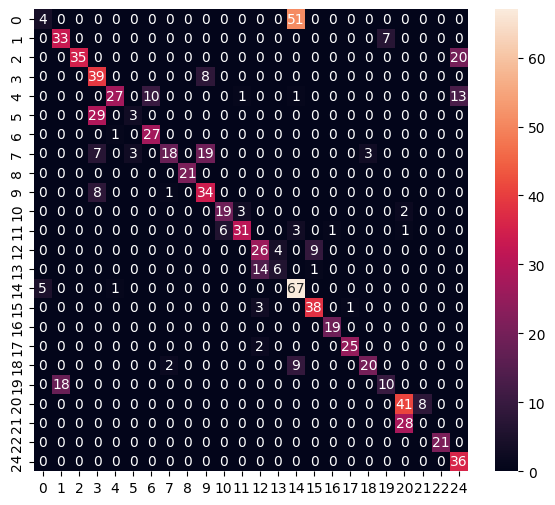

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.07      0.12        55
           1       0.65      0.82      0.73        40
           2       1.00      0.64      0.78        55
           3       0.47      0.83      0.60        47
           4       0.93      0.52      0.67        52
           5       0.50      0.09      0.16        32
           6       0.73      0.96      0.83        28
           7       0.86      0.36      0.51        50
           8       1.00      1.00      1.00        21
           9       0.56      0.79      0.65        43
          10       0.76      0.79      0.78        24
          11       0.89      0.74      0.81        42
          12       0.58      0.67      0.62        39
          13       0.60      0.29      0.39        21
          14       0.51      0.92      0.66        73
          15       0.79      0.90      0.84        42
          16       0.95      1.00      0.97        19
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig("model/keypoint_classifier/current_confusion_matrix.png")
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

D:\GodotProjects\tddd57-labs\hand-gesture-recognition-mediapipe\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Albin\AppData\Local\Temp\tmp65go4anh\assets


INFO:tensorflow:Assets written to: C:\Users\Albin\AppData\Local\Temp\tmp65go4anh\assets


7468

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8790224e-01 2.4472965e-11 2.8690525e-07 1.7734121e-11 1.1038337e-03
 6.6694150e-15 6.7913315e-06 1.1216080e-03 1.1492205e-09 2.4595440e-10
 1.2886895e-09 1.1551697e-08 1.8676090e-08 3.0406957e-07 4.6438137e-01
 4.1336927e-11 1.0610185e-08 1.6578507e-08 3.4547371e-01 8.4784506e-12
 1.4347063e-31 0.0000000e+00 1.1270349e-36 4.2011117e-26 9.8757710e-06]
14
